In [3]:
import pandas as pd
import sqlite3
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline

In [49]:
# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("database.sqlite")
df_country = pd.read_sql_query("SELECT * from Country", con)

df_match = pd.read_sql_query("""SELECT Match.id, 
                                        Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season, 
                                        stage, 
                                        date,
                                        HT.team_long_name AS  home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal, 
                                        away_team_goal,
                                        case when goal='0' or goal=0 or goal='1' then
                                            goal
                                        when goal is null then
                                            0
                                        else
                                            1
                                            end as goal,
                                            
                                        case when shoton='0' or shoton=0 or shoton='1' then
                                            shoton
                                        when shoton is null then
                                            0
                                        else
                                            1
                                            end as shoton,
                                        case when shotoff='0' or shotoff=0 or shotoff='1' then
                                            shotoff
                                        when shotoff is null then
                                            0
                                        else
                                            1
                                            end as shotoff,
                                        case when foulcommit='0' or foulcommit=0 or foulcommit='1' then
                                            foulcommit
                                        when foulcommit is null then
                                            0
                                        else
                                            1
                                            end as foulcommit,
                                        case when card='0' or card=0 or card='1' then
                                            card
                                        when card is null then
                                            0
                                        else
                                            1
                                            end as card,
                                        case when cross='0' or cross=0 or cross='1' then
                                            cross
                                        when cross is null then
                                            0
                                        else
                                            1
                                            end as cross,
                                        case when corner='0' or corner=0 or corner='1' then
                                            corner
                                        when corner is null then
                                            0
                                        else
                                            1
                                            end as corner,
                                        case when possession='0' or possession=0 or possession='1' then
                                            possession
                                        when possession is null then
                                            0
                                        else
                                            1
                                            end as possession
                                        
                                        
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                
                                ORDER by date
                                LIMIT 100000;""", con)
# Verify that result of SQL query is stored in the dataframe
con.close()
df_match.head()



,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
0,4769,France,France Ligue 1,2008/2009,1,2008-08-09 00:00:00,AJ Auxerre,FC Nantes,2,1,0,0,0,0,0,0,0,0
1,4770,France,France Ligue 1,2008/2009,1,2008-08-09 00:00:00,Girondins de Bordeaux,SM Caen,2,1,0,0,0,0,0,0,0,0
2,4771,France,France Ligue 1,2008/2009,1,2008-08-09 00:00:00,Le Havre AC,OGC Nice,1,0,0,0,0,0,0,0,0,0
3,4772,France,France Ligue 1,2008/2009,1,2008-08-09 00:00:00,Le Mans FC,FC Lorient,0,1,0,0,0,0,0,0,0,0
4,4774,France,France Ligue 1,2008/2009,1,2008-08-09 00:00:00,AS Monaco,Paris Saint-Germain,1,0,0,0,0,0,0,0,0,0


In [50]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_match['country_name'])
df_match['country_name']=le.transform(df_match['country_name'])
le.fit(df_match['league_name'])
df_match['league_name']=le.transform(df_match['league_name'])

le.fit(df_match['home_team'])
df_match['home_team']=le.transform(df_match['home_team'])

le.fit(df_match['away_team'])
df_match['away_team']=le.transform(df_match['away_team'])

le.fit(df_match['date'])
df_match['date']=le.transform(df_match['date'])


le.fit(df_match['season'])
df_match['season']=le.transform(df_match['season'])


df_match.fillna(0,inplace=True)


df_match.head(100)

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
0,4769,1,1,0,1,0,6,56,2,1,0,0,0,0,0,0,0,0
1,4770,1,1,0,1,0,67,128,2,1,0,0,0,0,0,0,0,0
2,4771,1,1,0,1,0,81,98,1,0,0,0,0,0,0,0,0,0
3,4772,1,1,0,1,0,82,54,0,1,0,0,0,0,0,0,0,0
4,4774,1,1,0,1,0,7,102,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5091,1,1,0,4,11,79,67,2,1,0,0,0,0,0,0,0,0
96,5097,1,1,0,4,11,9,99,0,1,0,0,0,0,0,0,0,0
97,5098,1,1,0,4,11,146,138,0,0,0,0,0,0,0,0,0,0
98,8007,2,2,0,3,11,51,73,4,1,1,1,1,1,1,1,1,1


In [51]:
## SPliting based on Shoton, foulcommit, possesion

Training_df=df_match.loc[(df_match['shoton']==1) & (df_match['foulcommit']==1) & (df_match['possession']==1)]

Testing_df=df_match.loc[(df_match['shoton']==0) & (df_match['foulcommit']==0) & (df_match['possession']==0)]


X_train = Training_df.drop('home_team', axis=1)
y_train = Training_df['home_team']


X_test = Testing_df.drop('home_team', axis=1)
y_test = Testing_df['home_team']

X_train.shape

(13567, 17)

In [53]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


In [54]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 1]
 [0 0 1 ... 0 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         7
           6       0.08      0.02      0.03        52
           7       0.04      0.02      0.03        46
           8       0.04      0.02      0.03        52
           9       0.05      0.02      0.03        50
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         0
          41       0.00      0.00      0.00         5
          42       0.00      0.00      0.00         0
          48   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(178.7848910823251, 214.78829268292682, 'X[7] <= 102.5\ngini = 0.764\nsamples = 11668\nvalue = [2627, 3807, 2873, 1435, 633, 201, 65, 17, 6, 3, 1]'),
 Text(100.48673051345106, 209.48487804878047, 'X[5] <= 567.5\ngini = 0.76\nsamples = 7296\nvalue = [1768, 2372, 1770, 859, 363, 112, 36, 10, 4, 2, 0]'),
 Text(33.36631362321548, 204.18146341463415, 'X[6] <= 22.5\ngini = 0.754\nsamples = 3195\nvalue = [694, 1105, 793, 391, 155, 41, 10, 4, 2, 0, 0]'),
 Text(13.587296995495656, 198.8780487804878, 'X[7] <= 100.5\ngini = 0.747\nsamples = 571\nvalue = [166, 186, 125, 65, 23, 4, 2, 0, 0, 0, 0]'),
 Text(11.430420699777372, 193.57463414634145, 'X[5] <= 429.5\ngini = 0.749\nsamples = 552\nvalue = [164, 173, 122, 64, 23, 4, 2, 0, 0, 0, 0]'),
 Text(9.809443732375751, 188.2712195121951, 'X[7] <= 98.5\ngini = 0.751\nsamples = 412\nvalue = [124, 118, 102, 48, 15, 3, 2, 0, 0, 0, 0]'),
 Text(8.076023730570531, 182.96780487804878, 'X[6] <= 21.5\ngini = 0.754\nsamples = 397\nvalue = [114, 114, 101, 48,

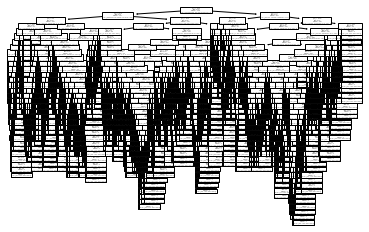

In [7]:
tree.plot_tree(classifier)